In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Project Task: Week 1
## Applied data science with Python

## 1. Import and aggregate data:
#### a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways (e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause avoidable delays in one dataset.
Hint: In this case, you would have to determine the keys to join the tables. A data description will be useful.

In [2]:
airport = pd.read_excel('airports.xlsx')
airlines = pd.read_excel('Airlines.xlsx')
runways = pd.read_excel('runways.xlsx')

In [3]:
airport.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [4]:
airport.shape

(73805, 18)

In [5]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [6]:
airlines.shape

(518556, 9)

In [7]:
runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [8]:
runways.shape

(43977, 20)

`Before merging the data lets drop the columns that will not play an important role in the model building`

In [10]:
runways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [11]:
runways.drop(['le_ident', 'le_latitude_deg','le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg','he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft'], axis = 1,inplace=True)

In [12]:
runways

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0
2,254165,6525,00AL,2300.0,200.0,TURF,0,0
3,270932,6526,00AR,40.0,40.0,GRASS,0,0
4,322128,322127,00AS,1450.0,60.0,Turf,0,0
...,...,...,...,...,...,...,...,...
43972,235186,27243,ZYTX,10499.0,148.0,CON,1,0
43973,235169,27244,ZYYJ,8530.0,148.0,CON,1,0
43974,354997,317861,ZYYK,8202.0,NaN,NaN,0,0
43975,346789,346788,ZZ-0003,1800.0,15.0,Turf,0,0


`Now lets remove the feature from the airpot data that is not usefull.`

In [14]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

In [15]:
airport.drop(['continent', 'iso_country', 'iso_region','municipality', 'gps_code','local_code', 'home_link',
            'wikipedia_link', 'keywords'], axis=1, inplace=True)
airport

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,no,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN
...,...,...,...,...,...,...,...,...,...
73800,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,no,NaN
73801,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,no,NaN
73802,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,no,NaN
73803,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,no,ZYW


`Now lets merge the runways and airport data.`

In [17]:
airport_runway = pd.merge(airport, runways, left_on = "ident", right_on = "airport_ident")

In [19]:
airport_runway.drop(['id_x', 'id_y'], axis=1, inplace=True)

In [20]:
airport_runway

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN,6523,00A,80.0,80.0,ASPH-G,1,0
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN,6524,00AK,2500.0,70.0,GRVL,0,0
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN,6525,00AL,2300.0,200.0,TURF,0,0
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN,6526,00AR,40.0,40.0,GRASS,0,0
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,no,NaN,322127,00AS,1450.0,60.0,Turf,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43972,ZYTX,large_airport,Shenyang Taoxian International Airport,41.639801,123.483002,198.0,yes,SHE,27243,ZYTX,10499.0,148.0,CON,1,0
43973,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,yes,YNJ,27244,ZYYJ,8530.0,148.0,CON,1,0
43974,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,NaN,yes,YKH,317861,ZYYK,8202.0,NaN,NaN,0,0
43975,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,no,NaN,346788,ZZ-0003,1800.0,15.0,Turf,0,0


`Now lets merge the final column airline.`

In [22]:
final_df = pd.merge(airlines,airport_runway,how = "inner", left_on = "AirportFrom", right_on = "iata_code" )

In [23]:
final_df.drop_duplicates(subset=['id'], keep='first', inplace=True)
final_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
4,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
8,9,DL,2606,SFO,MSP,3,35,216,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
12,129,DL,1580,SFO,DTW,3,345,270,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
16,150,UA,756,SFO,DEN,3,348,158,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160266,451344,CO,2,GUM,HNL,1,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160268,469866,CO,2,GUM,HNL,2,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160270,488365,CO,2,GUM,HNL,3,400,430,0,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160272,506855,CO,2,GUM,HNL,4,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0


### b. When it comes to on-time arrivals, different airlines perform differently based on the amount of experience they have. The major airlines in this field include US Airways Express (founded in 1967) Continental Airlines (founded in 1934), and Express Jet (founded in 19860. Pull such information specific to various airlines from the Wikipedia page link given below.https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.
Hint: Here, you should use web scraping to learn how long an airline has been operating.

`# Now lets use the web scrapping to import the data frome the wikipedia.`

In [24]:
url = "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"
tables = pd.read_html(url)

In [25]:
print(tables)

[                 Airline  Image IATA ICAO         Callsign  \
0        Alaska Airlines    NaN   AS  ASA           ALASKA   
1          Allegiant Air    NaN   G4  AAY        ALLEGIANT   
2      American Airlines    NaN   AA  AAL         AMERICAN   
3         Avelo Airlines    NaN   XP  VXP            AVELO   
4         Breeze Airways    NaN   MX  MXY             MOXY   
5        Delta Air Lines    NaN   DL  DAL            DELTA   
6       Eastern Airlines    NaN   2D  EAL          EASTERN   
7      Frontier Airlines    NaN   F9  FFT  FRONTIER FLIGHT   
8      Hawaiian Airlines    NaN   HA  HAL         HAWAIIAN   
9                JetBlue    NaN   B6  JBU          JETBLUE   
10    Southwest Airlines    NaN   WN  SWA        SOUTHWEST   
11       Spirit Airlines    NaN   NK  NKS     SPIRIT WINGS   
12  Sun Country Airlines    NaN   SY  SCX      SUN COUNTRY   
13       United Airlines    NaN   UA  UAL           UNITED   

                         Primary hubs, Secondary hubs  Founded  \
0 

In [26]:
tables[0]

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997,Founded as WestJet Express and commenced opera...
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926,Founded as American Airways and commenced oper...
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987,First did business as Casino Express Airlines ...
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018,NaN
5,Delta Air Lines,NaN,DL,DAL,DELTA,AtlantaBostonDetroitLos AngelesMinneapolis/St....,1924,Founded as Huff Daland Dusters and commenced o...
6,Eastern Airlines,NaN,2D,EAL,EASTERN,MiamiNew York-JFK,2010,NaN
7,Frontier Airlines,NaN,F9,FFT,FRONTIER FLIGHT,DenverAtlantaChicago-O'HareCincinnatiCleveland...,1994,NaN
8,Hawaiian Airlines,NaN,HA,HAL,HAWAIIAN,HonoluluKahului,1929,Founded as Inter-Island Airways in early 1929 ...
9,JetBlue,NaN,B6,JBU,JETBLUE,New York-JFKBostonLos AngelesFort LauderdaleOr...,1998,Founded as New Air and commenced operations in...


In [32]:
tables[6]

,Airline,Image,IATA,ICAO,Callsign,"Primary Hubs, Secondary Hubs",Founded,Notes
0,Comco,NaN,NaN,NaN,NaN,NaN,2002,NaN
1,Janet,NaN,NaN,WWW,JANET,Las Vegas,1972,NaN
2,Justice Prisoner and Alien Transportation System,NaN,NaN,JUD,JUSTICE,Oklahoma City,1980,Commenced operations in 1995.


In [33]:
# Lets first merge all wikipedia table.
wiki_table = [tables[0],tables[1],tables[2],tables[3],tables[4],tables[5],tables[6]]

In [34]:
wiki_tables = pd.concat(wiki_table, ignore_index=True)

In [35]:
wiki_tables

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes,"Primary Hubs, Secondary Hubs"
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932.0,Founded as McGee Airways and commenced operati...,NaN
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997.0,Founded as WestJet Express and commenced opera...,NaN
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926.0,Founded as American Airways and commenced oper...,NaN
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987.0,First did business as Casino Express Airlines ...,NaN
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
137,Lifestar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Life Lion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,Comco,NaN,NaN,NaN,NaN,NaN,2002.0,NaN,NaN
140,Janet,NaN,NaN,WWW,JANET,NaN,1972.0,NaN,Las Vegas


### c. You should then get all the information gathered so far in one place.

`First we got only that column from wiki pedia table that we need to merge.`

In [36]:
wiki_df = wiki_tables[['IATA', "Founded"]]
wiki_df

,IATA,Founded
0,AS,1932.0
1,G4,1997.0
2,AA,1926.0
3,XP,1987.0
4,MX,2018.0
...,...,...
137,NaN,NaN
138,NaN,NaN
139,NaN,2002.0
140,NaN,1972.0


In [37]:
# Now we gather all the information that we got from wiki pedia link and the data that we have.
df = final_df.merge(wiki_df, left_on ='Airline', right_on = "IATA")

In [38]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,IATA,Founded
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434919,497838,9E,4292,LWB,JFK,3,890,110,1,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434920,516333,9E,4292,LWB,JFK,4,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434921,534123,9E,4292,LWB,JFK,5,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434922,69058,9E,3752,ABR,MSP,7,410,76,1,KABR,...,ABR,3358,KABR,6901.0,100.0,CON,1,0,9E,1985.0


### d. The total passenger traffic may also contribute to flight delays. The term hub refers to busy commercial airports. Large hubs are airports that account for at least 1 percent of the total passenger enplanements in the United States. Airports that account for 0.25 percent to 1 percent of total passenger enplanements are considered medium hubs. Pull passenger traffic data from the Wikipedia page given below using web scraping and collate it in a table.
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [39]:
# Now lets use the web scrapping to import the data frome the wikipedia.
url2 = "https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
table = pd.read_html(url2)

In [40]:
table

[    Rank(2021)                             Airports (large hubs) IATACode  \
 0            1  Hartsfield–Jackson Atlanta International Airport      ATL   
 1            2                 Los Angeles International Airport      LAX   
 2            3              Chicago O'Hare International Airport      ORD   
 3            4           Dallas/Fort Worth International Airport      DFW   
 4            5                      Denver International Airport      DEN   
 5            6             John F. Kennedy International Airport      JFK   
 6            7               San Francisco International Airport      SFO   
 7            8              Seattle-Tacoma International Airport      SEA   
 8            9                     Orlando International Airport      MCO   
 9           10                  Harry Reid International Airport      LAS   
 10          11           Charlotte-Douglas International Airport      CLT   
 11          12              Newark Liberty International Airpor

In [41]:
table[0] = table[0].drop(['2021', '2013[10]', '2012[11]', '2011[12]'], axis=1)

In [42]:
table[0].head()

,Rank(2021),Airports (large hubs),IATACode,Major cities served,State,2020[3],2019[4],2018[5],2017[6],2016[7],2015[8],2014[9]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,20559866,53505795,51865797,50251964,50501858,49340732,46604273
1,2,Los Angeles International Airport,LAX,Los Angeles,CA,18593421,35778573,32821799,31816933,31283579,31589839,30804567
2,3,Chicago O'Hare International Airport,ORD,Chicago,IL,16243216,33592945,31362941,29809097,28267394,26280043,26000591
3,4,Dallas/Fort Worth International Airport,DFW,Dallas/Fort Worth,TX,14606034,40871223,39873927,38593028,37589899,36305668,33843426
4,5,Denver International Airport,DEN,Denver,CO,14055777,42939104,42624050,41232432,39636042,36351272,34314197


In [43]:
table[0]['traffic_Chg19_20'] = table[0]['2020[3]'] - table[0]['2019[4]']

In [44]:
table[0]['traffic_Chg18_19'] = table[0]['2019[4]'] - table[0]['2018[5]']
table[0]['hubs'] = str('large_hub')

In [45]:
table[0] = table[0][['IATACode', 'traffic_Chg19_20', 'traffic_Chg18_19', 'hubs']]
table[0]

,IATACode,traffic_Chg19_20,traffic_Chg18_19,hubs
0,ATL,-32945929,1639998,large_hub
1,LAX,-17185152,2956774,large_hub
2,ORD,-17349729,2230004,large_hub
3,DFW,-26265189,997296,large_hub
4,DEN,-28883327,315054,large_hub
5,JFK,-11246819,1917739,large_hub
6,SFO,-14094543,1359791,large_hub
7,SEA,-14144302,933349,large_hub
8,MCO,-11902116,810972,large_hub
9,LAS,-12635024,399391,large_hub


In [46]:
table[1].head()

,Rank(2020),Airports (medium hubs),IATACode,City served,State,2020,2019,2018,2017,2016,2015[7],2014[1]
0,29,Daniel K. Inouye International Airport,HNL,Honolulu,HI,9893930,8408457,8134848.0,7876769.0,7554596.0,7040921.0,4522341.0
1,30,Portland International Airport,PDX,Portland,OR,9790489,11595454,11367176.0,11506310.0,11470854.0,11242375.0,10057794.0
2,31,Nashville International Airport,BNA,Nashville,TN,8498877,9797408,9940866.0,9435473.0,9071154.0,8340234.0,7878760.0
3,32,Austin–Bergstrom International Airport,AUS,Austin,TX,3141505,8683711,7921797.0,6973115.0,6095545.0,5797547.0,5219982.0
4,33,Dallas Love Field,DAL,Dallas,TX,8069178,7069614,6937061.0,6741870.0,6285181.0,5937944.0,5800726.0


In [47]:
table[1]['traffic_Chg19_20'] = table[1]['2020'] - table[1]['2019']
table[1]['traffic_Chg18_19'] = table[1]['2019'] - table[1]['2018']
table[1]['hubs'] = str('Medium_hub')

In [48]:
table[1] = table[1][['IATACode', 'traffic_Chg19_20', 'traffic_Chg18_19','hubs']]
table[1]

,IATACode,traffic_Chg19_20,traffic_Chg18_19,hubs
0,HNL,1485473,273609.0,Medium_hub
1,PDX,-1804965,228278.0,Medium_hub
2,BNA,-1298531,-143458.0,Medium_hub
3,AUS,-5542206,761914.0,Medium_hub
4,DAL,999564,132553.0,Medium_hub
5,STL,-2238287,410173.0,Medium_hub
6,SJC,-270221,124712.0,Medium_hub
7,HOU,1912672,424899.0,Medium_hub
8,RDU,452929,422783.0,Medium_hub
9,MSY,141501,151623.0,Medium_hub


In [49]:
# Lets first merge all wikipedia table.
wiki_data = [table[0],table[1]]
wiki_data = pd.concat(wiki_data, ignore_index=True)
wiki_data

,IATACode,traffic_Chg19_20,traffic_Chg18_19,hubs
0,ATL,-32945929,1639998.0,large_hub
1,LAX,-17185152,2956774.0,large_hub
2,ORD,-17349729,2230004.0,large_hub
3,DFW,-26265189,997296.0,large_hub
4,DEN,-28883327,315054.0,large_hub
...,...,...,...,...
59,OMA,132539,NaN,Medium_hub
60,BUF,390491,NaN,Medium_hub
61,CHS,284,NaN,Medium_hub
62,MEM,-67924,NaN,Medium_hub


In [50]:
# Now we gather all the information that we got from wiki pedia link and the data that we have.
final_df = df.merge(wiki_data, left_on ='iata_code', right_on = "IATACode")

In [51]:
final_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,width_ft,surface,lighted,closed,IATA,Founded,IATACode,traffic_Chg19_20,traffic_Chg18_19,hubs
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-14094543,1359791.0,large_hub
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-14094543,1359791.0,large_hub
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-14094543,1359791.0,large_hub
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-14094543,1359791.0,large_hub
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-14094543,1359791.0,large_hub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363125,506267,9E,4052,DAL,MEM,4,370,90,0,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,999564,132553.0,Medium_hub
363126,512858,9E,3704,DAL,MEM,4,705,92,1,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,999564,132553.0,Medium_hub
363127,518247,9E,4060,DAL,MEM,4,990,90,0,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,999564,132553.0,Medium_hub
363128,524678,9E,4052,DAL,MEM,5,370,90,1,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,999564,132553.0,Medium_hub


### 2. You should then examine the missing values in each field, perform missing value treatment, and justify your actions.

In [52]:
# Now we have the final data first we remove some column that is not useable.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363130 entries, 0 to 363129
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 363130 non-null  int64  
 1   Airline            363130 non-null  object 
 2   Flight             363130 non-null  int64  
 3   AirportFrom        363130 non-null  object 
 4   AirportTo          363130 non-null  object 
 5   DayOfWeek          363130 non-null  int64  
 6   Time               363130 non-null  int64  
 7   Length             363130 non-null  int64  
 8   Delay              363130 non-null  int64  
 9   ident              363130 non-null  object 
 10  type               363130 non-null  object 
 11  name               363130 non-null  object 
 12  latitude_deg       363130 non-null  float64
 13  longitude_deg      363130 non-null  float64
 14  elevation_ft       363130 non-null  float64
 15  scheduled_service  363130 non-null  object 
 16  ia

In [53]:
final_df.drop(['id','AirportFrom','airport_ident','iata_code','AirportTo','surface', 'ident',
                          'IATA', 'IATACode','name'], axis=1,inplace=True)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363130 entries, 0 to 363129
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            363130 non-null  object 
 1   Flight             363130 non-null  int64  
 2   DayOfWeek          363130 non-null  int64  
 3   Time               363130 non-null  int64  
 4   Length             363130 non-null  int64  
 5   Delay              363130 non-null  int64  
 6   type               363130 non-null  object 
 7   latitude_deg       363130 non-null  float64
 8   longitude_deg      363130 non-null  float64
 9   elevation_ft       363130 non-null  float64
 10  scheduled_service  363130 non-null  object 
 11  airport_ref        363130 non-null  int64  
 12  length_ft          363130 non-null  float64
 13  width_ft           363130 non-null  float64
 14  lighted            363130 non-null  int64  
 15  closed             363130 non-null  int64  
 16  Fo

In [55]:
# Now lets check the null value and treat them.
final_df.isnull().sum()

Airline                  0
Flight                   0
DayOfWeek                0
Time                     0
Length                   0
Delay                    0
type                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
scheduled_service        0
airport_ref              0
length_ft                0
width_ft                 0
lighted                  0
closed                   0
Founded                  0
traffic_Chg19_20         0
traffic_Chg18_19     11575
hubs                     0
dtype: int64

In [62]:
final_df

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,scheduled_service,airport_ref,length_ft,width_ft,lighted,closed,Founded,traffic_Chg19_20,traffic_Chg18_19,hubs
0,AA,2466,3,20,195,1,large_airport,37.618999,-122.375000,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,large_hub
1,AA,526,3,360,215,0,large_airport,37.618999,-122.375000,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,large_hub
2,AA,552,3,360,315,1,large_airport,37.618999,-122.375000,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,large_hub
3,AA,810,3,385,255,0,large_airport,37.618999,-122.375000,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,large_hub
4,AA,24,3,425,325,1,large_airport,37.618999,-122.375000,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,large_hub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363125,9E,4052,4,370,90,0,medium_airport,32.847099,-96.851799,487.0,yes,3479,7752.0,150.0,1,0,1985.0,999564,132553.0,Medium_hub
363126,9E,3704,4,705,92,1,medium_airport,32.847099,-96.851799,487.0,yes,3479,7752.0,150.0,1,0,1985.0,999564,132553.0,Medium_hub
363127,9E,4060,4,990,90,0,medium_airport,32.847099,-96.851799,487.0,yes,3479,7752.0,150.0,1,0,1985.0,999564,132553.0,Medium_hub
363128,9E,4052,5,370,90,1,medium_airport,32.847099,-96.851799,487.0,yes,3479,7752.0,150.0,1,0,1985.0,999564,132553.0,Medium_hub


#### Only one `traffic_Chg18_19` column contain the null value which is 3.18% of total data.
##### So we will drop that rows of null value because we have plenty of data.

In [58]:
final_df.dropna(axis=0,inplace=True)

## 3. Perform data visualization and share your insights on the following points:
### a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines.

<AxesSubplot:xlabel='Airline', ylabel='count'>

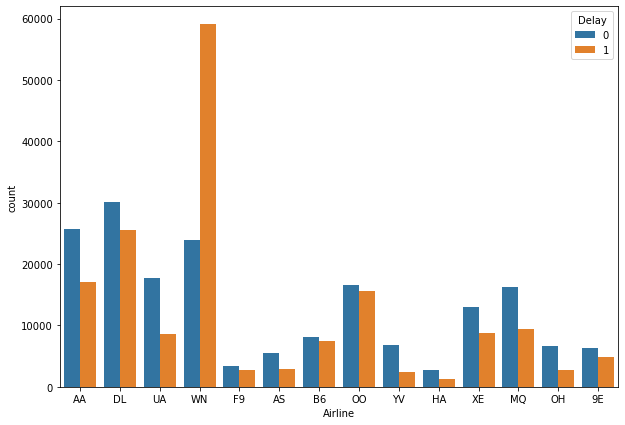

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(final_df['Airline'], hue= final_df['Delay'])

Airline code WN represent the southwest airlines.
The graph clear show that 70% of flight of south west airline is delayed

### b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

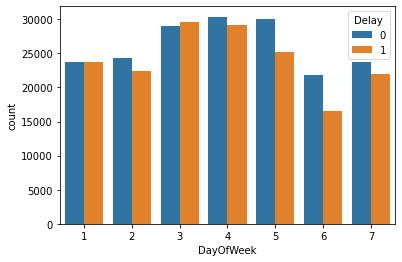

In [61]:
sns.countplot(final_df['DayOfWeek'],hue= final_df['Delay'])

We can from the above graph that on 6th day of the week we have least delayed flight.

### c. Which airlines should be recommended for short-, medium-, and long-distance travel?

In [69]:
final_df['Length'].max()

620

<AxesSubplot:xlabel='Length', ylabel='Count'>

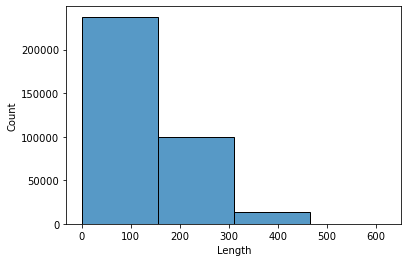

In [78]:
sns.histplot(final_df['Length'], bins = 4)

In [80]:
final_df['Airline'][final_df['Length']<180].value_counts()

WN    70485
DL    38483
OO    30767
MQ    24954
AA    24370
XE    20807
UA    15534
9E    11145
B6     9766
YV     9152
OH     8989
AS     5386
F9     5105
HA     3034
Name: Airline, dtype: int64

The above airlines are recommended for Short distance as flight last anywhere from 30 minutes to 3 hours.

In [86]:
final_df['Airline'][(final_df['Length']>180) & (final_df['Length']<360)].value_counts()

DL    16180
AA    15959
WN    11333
UA     9380
B6     4847
AS     2354
OO     1473
F9     1075
XE      911
HA      751
MQ      512
OH      423
YV      185
9E       47
Name: Airline, dtype: int64

The above airlines are recommended for Medium distance as flight last anywhere from 3 hours to 6 hours.

In [87]:
final_df['Airline'][final_df['Length']>360].value_counts()

UA    1304
AA    1081
DL     842
B6     822
AS     496
HA     252
WN      52
Name: Airline, dtype: int64

The above airlines are recommended for Long distance as flights are extend beyond 6 hours.

#### d. Do you notice any patterns in the departure times of long-duration flights?

In [114]:
final_df[final_df['Length']>360].describe().T

,count,mean,std,min,25%,50%,75%,max
Flight,4849.0,5.563933e+02,7.537248e+02,1.000000e+00,5.900000e+01,2.010000e+02,8.460000e+02,3.760000e+03
DayOfWeek,4849.0,4.004125e+00,1.925699e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
Time,4849.0,8.292021e+02,2.868094e+02,1.000000e+02,5.500000e+02,8.850000e+02,1.080000e+03,1.435000e+03
Length,4849.0,3.959827e+02,4.084421e+01,3.610000e+02,3.750000e+02,3.850000e+02,4.000000e+02,6.200000e+02
Delay,4849.0,4.188492e-01,4.934215e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
latitude_deg,4849.0,3.873399e+01,6.170430e+00,1.843940e+01,3.894450e+01,4.063945e+01,4.078575e+01,4.744916e+01
longitude_deg,4849.0,-8.772557e+01,2.456466e+01,-1.579242e+02,-9.703800e+01,-7.377932e+01,-7.377932e+01,-6.600180e+01
elevation_ft,4849.0,2.393364e+02,7.504192e+02,8.000000e+00,1.300000e+01,1.800000e+01,1.250000e+02,5.431000e+03
airport_ref,4849.0,3.726874e+03,4.652847e+02,3.384000e+03,3.602000e+03,3.622000e+03,3.632000e+03,6.384000e+03
length_ft,4849.0,1.004975e+04,2.111061e+03,4.892000e+03,7.861000e+03,1.100000e+04,1.207900e+04,1.207900e+04


### 4. How many flights were delayed at large hubs compared to medium hubs? Use appropriate visualization to represent your findings

<AxesSubplot:xlabel='hubs', ylabel='count'>

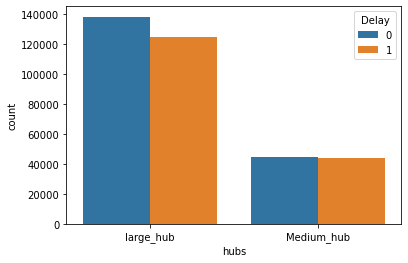

In [105]:
sns.countplot(final_df['hubs'], hue = final_df['Delay'])

From the large hubs its clear approx 120000 filght is delayed but from the medium hubs aprrox 40000 is delayed.

### 5. Use hypothesis testing strategies to discover:
#### a. If the airport's altitude has anything to do with flight delays for incoming and departing flights

In [115]:
from scipy.stats import chi2_contingency
table = [final_df['latitude_deg'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=186602.569, p=1.000
Probably independent


So its clear from the above hypothesis testing that altitude is nothing to do with the flight delay

#### b. If the number of runways at an airport affects flight delays

In [117]:
from scipy.stats import chi2_contingency
table = [final_df['airport_ref'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=192200.911, p=1.000
Probably independent


So its clear from the above hypothesis testing that no of runway is nothing to do with the flight delay

#### c. If the duration of a flight (length) affects flight delays

In [118]:
from scipy.stats import spearmanr
data1 = final_df['Length']
data2 = final_df['Delay']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')    

stat=-0.002, p=0.179
Probably independent


Both the variable are independent so that length of the flight is not affecting directly the delay.

### 6. Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this, and share your findings

In [121]:
predictor = final_df.drop(['Delay'], axis=1)
corr = predictor.corr()

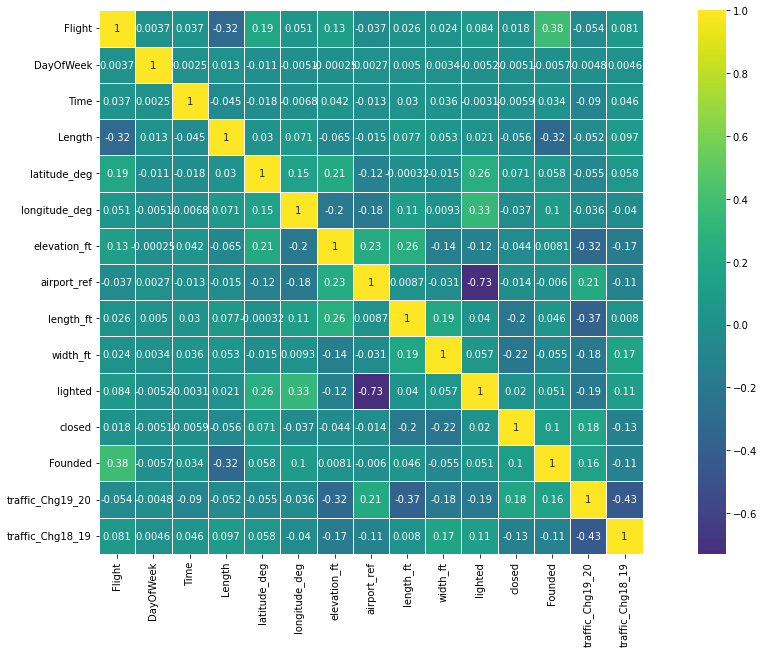

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, center=0, linewidths=.5, square = True , annot = True , cmap='viridis')
plt.show()

# Project Task: Week 1
## Machine learning
### 1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [127]:
# Before applying the one hot encodding or the label encoding first we check all feature data type.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351555 entries, 0 to 363129
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            351555 non-null  object 
 1   Flight             351555 non-null  int64  
 2   DayOfWeek          351555 non-null  int64  
 3   Time               351555 non-null  int64  
 4   Length             351555 non-null  int64  
 5   Delay              351555 non-null  int64  
 6   type               351555 non-null  object 
 7   latitude_deg       351555 non-null  float64
 8   longitude_deg      351555 non-null  float64
 9   elevation_ft       351555 non-null  float64
 10  scheduled_service  351555 non-null  object 
 11  airport_ref        351555 non-null  int64  
 12  length_ft          351555 non-null  float64
 13  width_ft           351555 non-null  float64
 14  lighted            351555 non-null  int64  
 15  closed             351555 non-null  int64  
 16  Fo

In [128]:
final_df['Airline'].value_counts()

WN    82903
DL    55724
AA    42841
OO    32315
UA    26303
MQ    25698
XE    21733
B6    15497
9E    11192
OH     9440
YV     9337
AS     8355
F9     6180
HA     4037
Name: Airline, dtype: int64

In [129]:
final_df['type'].value_counts()

large_airport     334982
medium_airport     16573
Name: type, dtype: int64

In [130]:
final_df['scheduled_service'].value_counts()

yes    351555
Name: scheduled_service, dtype: int64

In [131]:
final_df['hubs'].value_counts()

large_hub     262540
Medium_hub     89015
Name: hubs, dtype: int64

The scheduled_service column throught has same value so it will not help in prediction so lets remove it and other three object column we will change through label encoder.

In [132]:
final_df = final_df.drop(['scheduled_service'], axis=1)

In [133]:
# Now using the ordinal encoder.
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [134]:
final_df['Airline'] = le.fit_transform(final_df['Airline'])
final_df['type'] = le.fit_transform(final_df['type'])
final_df['hubs'] = le.fit_transform(final_df['hubs'])

In [135]:
final_df.head()

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,Founded,traffic_Chg19_20,traffic_Chg18_19,hubs
0,1,2466,3,20,195,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,1
1,1,526,3,360,215,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,1
2,1,552,3,360,315,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,1
3,1,810,3,385,255,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,1
4,1,24,3,425,325,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,-14094543,1359791.0,1


### 2. Perform the following model building steps:
#### a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models
#### b. Use the stratified five-fold method to build and validate the models
Note: Make sure you use standardization effectively, ensuring no data leakage and leverage pipelines to have a cleaner code
#### c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation
#### d. Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use this data for testing or validation
Note: The final prediction will be based on the voting (majority class by 5 models created using the stratified 5-fold method)
#### g. Compare the results of logistic regression and decision tree classifier

In [136]:
# Lets first seperate the features and the target.
x = final_df.drop(['Delay'], axis= 1)
y = final_df["Delay"]

In [137]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [138]:
# First Split the data into the training and testing set before performing the further operation.
from sklearn.model_selection import train_test_split 

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=10)

#### LogisticRegression

In [140]:
# lets apply the logistic regression with the randomsearchcv hypermeter tunning.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
params = {"penalty": ["l1","l2"],
         'solver': ['newton-cg', 'liblinear']}

# Cross Validation
folds = 5

rscv = RandomizedSearchCV(estimator = lr,
                         param_distributions = params,
                         scoring = "accuracy",
                         verbose = 1,
                         cv= folds)

rscv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'liblinear']},
                   scoring='accuracy', verbose=1)

In [143]:
print(rscv.best_params_)
print(rscv.best_score_)

{'solver': 'liblinear', 'penalty': 'l1'}
0.5921478987792488


In [144]:
lr = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
lr.fit(x_train,y_train).score(x_train,y_train)

0.5923280414919136

In [145]:
lr.score(x_test, y_test)

0.593013994766185

#### DecisionTreeClassifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

params = {'criterion': ["gini", "entropy"],
          'min_samples_leaf' : [2,3,4,5,6,7,8,9],
         "max_depth": [2,3,4,5,6,7,8,9]}

rscv = RandomizedSearchCV(estimator = dt,
                             param_distributions= params,
                             scoring = "accuracy",
                             cv= 5,
                             verbose=1)
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9]},
                   scoring='accuracy', verbose=1)

In [147]:
print(rscv.best_params_)
print(rscv.best_score_)

{'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'entropy'}
0.6469110137916109


In [148]:
dtc = DecisionTreeClassifier(max_depth= 9, criterion= 'entropy',min_samples_leaf= 6)
dtc.fit(x_train, y_train).score(x_train, y_train)

0.6539464410443775

In [149]:
dtc.score(x_test, y_test)

0.649049948799636

`After seeing the result its clear decision tree has good accuracy.`

### 3. Use the stratified five-fold method to build and validate the models using the XGB classifier, compare all methods, and share your findings

In [150]:
from xgboost import XGBClassifier

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
                 'n_estimators': range(8, 20),
                 'max_depth': range(6, 10),
                 'learning_rate': [.4, .45, .5, .55, .6],
                 'colsample_bytree': [.6, .7, .8, .9, 1]
                  }

# Instantiate the regressor: gbm
gbm = XGBClassifier()

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 3)

# Fit randomized_mse to the data
xgb_random.fit(x_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 16, 'max_depth': 8, 'learning_rate': 0.5, 'colsample_bytree': 0.9}
Best accuracy found:  0.6608301551327947


In [151]:
xgb = XGBClassifier(n_estimators=14, max_depth=9, learning_rate=0.45, colsample_bytree=0.9)
xgb.fit(x_train,y_train).score(x_train,y_train)

0.6860830786443699

In [152]:
# Now lets compare the all method.
print(lr.score(x_test, y_test))
print(dtc.score(x_test, y_test))
print(xgb.score(x_test, y_test))

0.593013994766185
0.649049948799636
0.6630447149846399


After comparing the accuracy of the diffrent model the best result we getting from the XGBclassifier.